In [2]:
import matplotlib as mpl
import pandas as pd

In [3]:
HEADER = "csv/pol-plots/"
rewards = [ 
    pd.read_csv(HEADER + f"UM{i}_rew.csv")
    for i in [1, 2, 3]
]
# ^each element: pd 0 | rew | agent | agent_ugly_name

for df in rewards:
    df.columns = ["ep", "utility", "policy", "policy_ugly_name"]
    # for nicer plot legend

UM1_rew = rewards[0][["ep", "utility", "policy"]]
UM2_rew = rewards[1][["ep", "utility", "policy"]]
UM3_rew = rewards[2][["ep", "utility", "policy"]]

for df in [UM1_rew, UM2_rew, UM3_rew]:
    df["policy type"] = df.apply(
        axis=1, 
        func = lambda row: "RL" if row.policy[-2:] == "RL" else "Fixed"
    )

In [4]:
import numpy as np
np.unique(UM2_rew["policy type"])

array(['Fixed', 'RL'], dtype=object)

In [5]:
import seaborn as sns
sns.set_theme(
    palette=sns.color_palette("colorblind"),
    font="Times New Roman",
    font_scale=2,
    style="whitegrid",
)
sns.axes_style(
    style = {"axes.linewidth":4}
)

{}

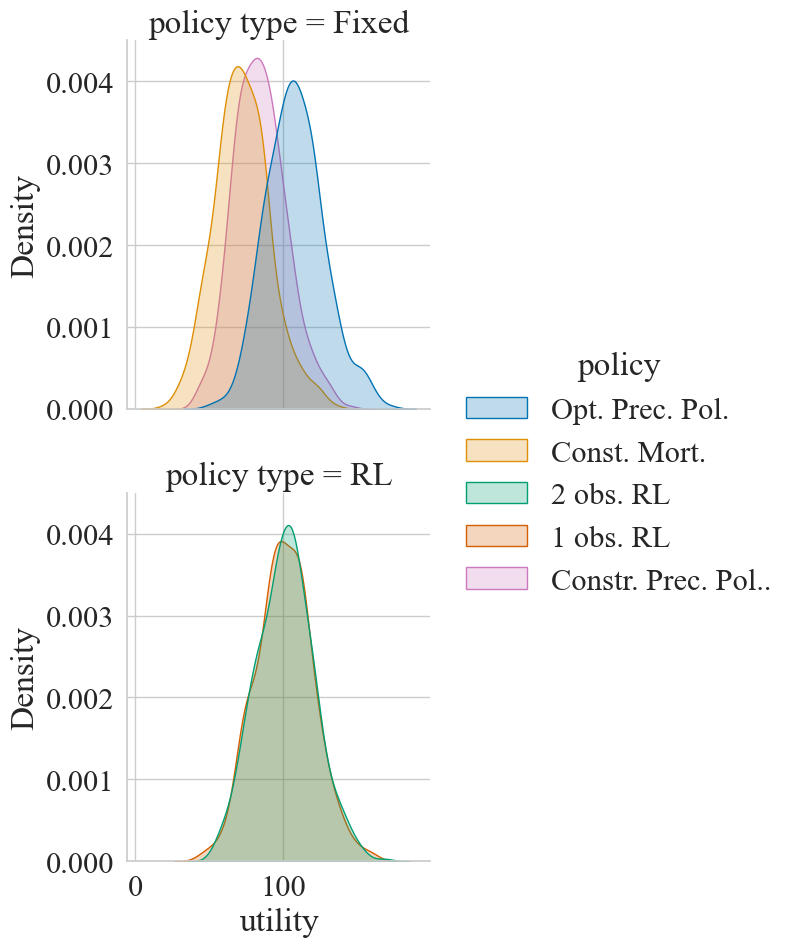

In [6]:
sns.displot(
    UM1_rew, x='utility', 
    hue='policy', 
    kind='kde', 
    fill=True,
    row='policy type'
)

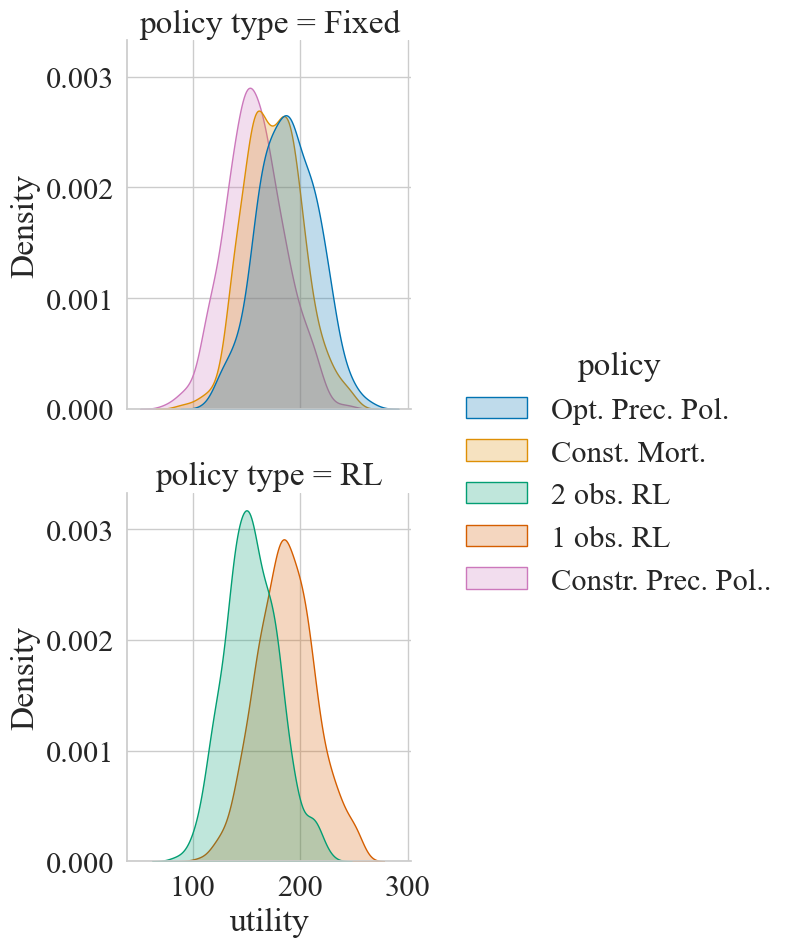

In [7]:
sns.displot(
    UM2_rew, x='utility', 
    hue='policy', 
    kind='kde', 
    fill=True,
    row='policy type'
)

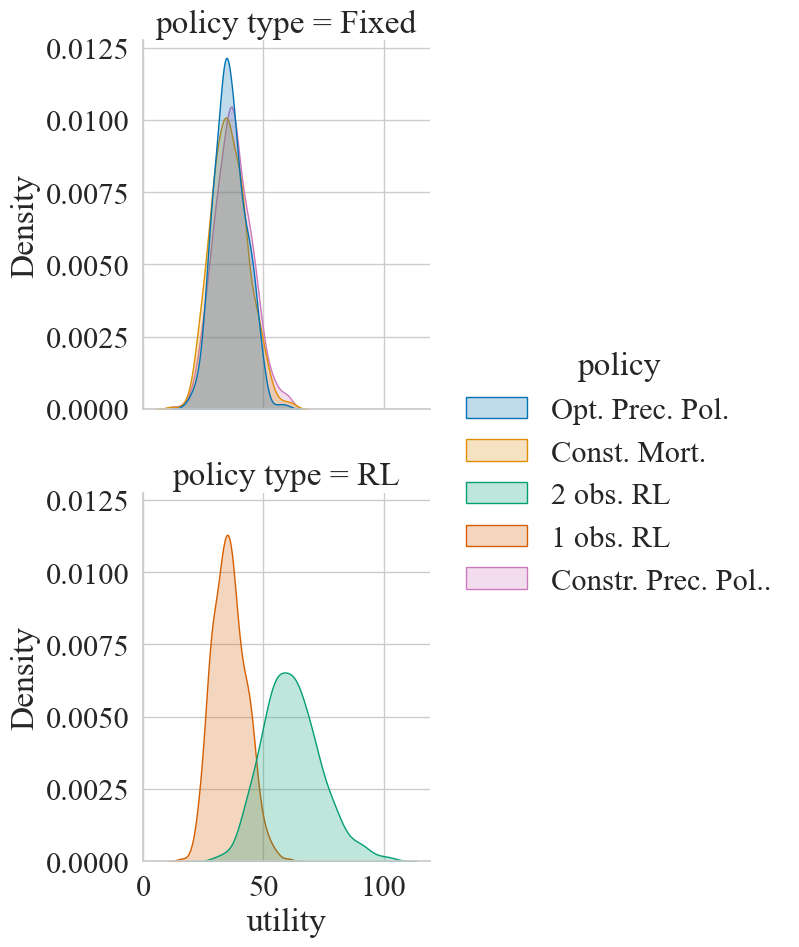

In [8]:
sns.displot(
    UM3_rew, x='utility', 
    hue='policy', 
    kind='kde', 
    fill=True,
    row='policy type'
)

In [9]:
UM1_rew['utility function'] = "Harvested biomass"
UM2_rew['utility function'] = "HARA"
UM3_rew['utility function'] = "Trophy fishing"

In [10]:
rew_df = pd.concat([UM1_rew, UM2_rew, UM3_rew])

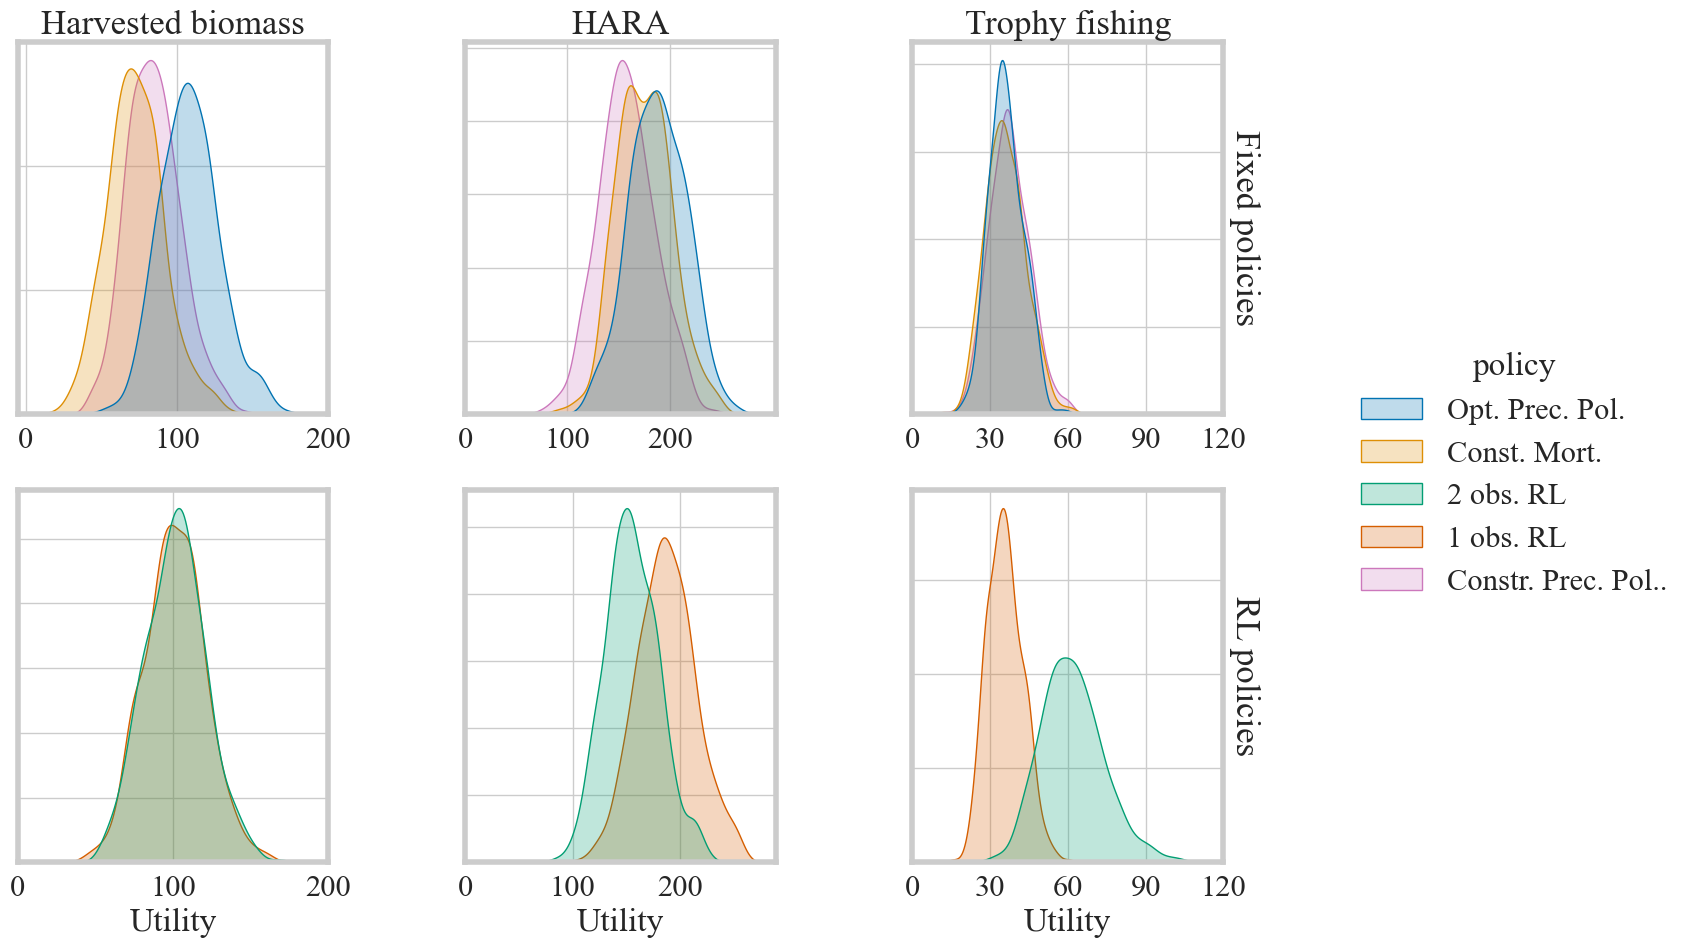

In [68]:
mpl.rcParams['axes.linewidth'] = 4

rew_df = rew_df.reset_index(drop=True)

g = sns.displot(
    rew_df, x='utility', 
    hue='policy', 
    kind='kde', 
    fill=True,
    row='policy type',
    col='utility function',
    facet_kws = dict(margin_titles=True, sharey=False, sharex=False),
)
g.set_titles(col_template="{col_name}", row_template="{row_name} policies", size=25)
g.set_axis_labels("Utility", "")
g.tight_layout()
for idx, ax in enumerate(g.axes.ravel()):
        ax.spines['right'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.spines['bottom'].set_visible(True) 
        ax.set(yticklabels=[])
        
        if (
                (ax.title.get_text() == "Trophy fishing")
                or (idx==5) # 6 axes in total, only top one has title text, so needed to catch lower right corner too here
        ):
            xticks = [0, 30, 60, 90, 120]
            ax.set(xticks=xticks)
            ax.set(xticklabels=xticks) 
        else:
            ax.set(xticks=[0, 100, 200])
            ax.set(xticklabels=[0, 100, 200])
g.savefig("../myst/figures/rewards.jpeg")
g

In [34]:
rew_summary_df = rew_df[["utility", "policy", "utility function"]].groupby(["policy", "utility function"]).agg(["mean", "std"])
rew_summary_df.head()
# rew_summary_df.columns = ['Mean Utility', 'St. Dev. Utility']
# rew_summary_df.index = ["1 obs. RL", "2 obs. RL", "FMSY", "cPP", "oPP"]
# rew_summary_df = rew_summary_df.reindex(["1 obs. RL", "2 obs. RL", "FMSY", "oPP", "cPP"])
# rew_summary_df.to_csv("csv/rew-table.csv")

utility           
                                   mean        std
policy    utility function                        
1 obs. RL HARA               186.834296  26.906553
          Harvested biomass  100.812742  19.670702
          Trophy fishing      35.706305   6.872379
2 obs. RL HARA               154.927104  24.725531
          Harvested biomass  101.393276  19.447278

In [ ]:
rew_summary_df.reset_index().pivot(columns='utility function', values)

policy   utility function     utility           
                                                  mean        std
0             1 obs. RL               HARA  186.834296  26.906553
1             1 obs. RL  Harvested biomass  100.812742  19.670702
2             1 obs. RL     Trophy fishing   35.706305   6.872379
3             2 obs. RL               HARA  154.927104  24.725531
4             2 obs. RL  Harvested biomass  101.393276  19.447278
5             2 obs. RL     Trophy fishing   61.655408  12.023446
6          Const. Mort.               HARA  174.692726  26.575648
7          Const. Mort.  Harvested biomass   72.546434  18.783181
8          Const. Mort.     Trophy fishing   35.888481   7.720950
9   Constr. Prec. Pol..               HARA  157.596883  27.491721
10  Constr. Prec. Pol..  Harvested biomass   84.550160  17.695214
11  Constr. Prec. Pol..     Trophy fishing   37.329812   7.826216
12      Opt. Prec. Pol.               HARA  187.986463  27.558137
13      Opt. Prec. Pol.  Harvested biomass  108.166502  19.710125
14      Opt. Prec. Pol.     Trophy fishing   36.044274   6.617747

In [63]:
df = rew_summary_df.reset_index()
df.columns = ['Policy', 'utility function', 'utility mean', 'utility st. dev.']
df['Utility Mean +/- St. Dev.'] = df.apply(
    axis=1, 
    func= lambda row: f"{row['utility mean']:.1f} +/- {row['utility st. dev.']:.1f}"
)
df = df.pivot(index='Policy', columns=['utility function'], values='Utility Mean +/- St. Dev.')
df= df[['Harvested biomass', 'HARA', 'Trophy fishing']]
df

utility function,Harvested biomass,HARA,Trophy fishing
Policy,,,
1 obs. RL,100.8 +/- 19.7,186.8 +/- 26.9,35.7 +/- 6.9
2 obs. RL,101.4 +/- 19.4,154.9 +/- 24.7,61.7 +/- 12.0
Const. Mort.,72.5 +/- 18.8,174.7 +/- 26.6,35.9 +/- 7.7
Constr. Prec. Pol..,84.6 +/- 17.7,157.6 +/- 27.5,37.3 +/- 7.8
Opt. Prec. Pol.,108.2 +/- 19.7,188.0 +/- 27.6,36.0 +/- 6.6


In [64]:
df.to_csv("csv/rew-table.csv")

In [62]:
UM1_rew[UM1_rew.policy=="Const. Mort."]['utility'].mean()

np.float64(72.54643395067606)